Shubhjyot Singh Chadha/
SAP ID:60009220197/
 D2-2 /D107

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

#Data Description

In [ ]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

All variables are not null so we need not worry about null values and do not need to do any imputation

In [ ]:
train.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


We have some categorical data/features in the dataset which we will change to numerical values.

In [ ]:
train.iloc[:,[train[x].dtype != 'object' for x in train]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         800 non-null    int64  
 1   A1_Score   800 non-null    int64  
 2   A2_Score   800 non-null    int64  
 3   A3_Score   800 non-null    int64  
 4   A4_Score   800 non-null    int64  
 5   A5_Score   800 non-null    int64  
 6   A6_Score   800 non-null    int64  
 7   A7_Score   800 non-null    int64  
 8   A8_Score   800 non-null    int64  
 9   A9_Score   800 non-null    int64  
 10  A10_Score  800 non-null    int64  
 11  age        800 non-null    float64
 12  result     800 non-null    float64
 13  Class/ASD  800 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 87.6 KB


In [ ]:
num_cols = [train[x].dtype != 'object' for x in train]

Below are the categorical cols:

In [ ]:
train.iloc[:,[train[x].dtype == 'object' for x in train]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           800 non-null    object
 1   ethnicity        800 non-null    object
 2   jaundice         800 non-null    object
 3   austim           800 non-null    object
 4   contry_of_res    800 non-null    object
 5   used_app_before  800 non-null    object
 6   age_desc         800 non-null    object
 7   relation         800 non-null    object
dtypes: object(8)
memory usage: 50.1+ KB


In [ ]:
cat_cols = [train[x].dtype == 'object' for x in train]

In [ ]:
for item in train.iloc[:,cat_cols]:
    print(train[item].unique(),end = "\n")
    print(item)

['f' 'm']
gender
['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
ethnicity
['no' 'yes']
jaundice
['no' 'yes']
austim
['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cyprus' 'Belgium' 'Burundi'
 'Bangladesh']
contry_of_res
['no' 'yes']
used_app_before
['18 and more']
age_desc
['Self' 'Relative' 'Parent' '?' 'Others' 'Health care professional']
relation


gender, autism, jaundice, used_app_before can be converted to numerical values as they are bivariate categorical values

We will also drop age_desc column as it only contains one unique value and is not useful to us.

Checking if the training data is consistent with the test data or not:

In [ ]:
for item in train.iloc[:,cat_cols]:
    print([x for x in test[item].unique() if x not in train[item].unique()],end = "\n")
    print(item)

[]
gender
[]
ethnicity
[]
jaundice
[]
austim
['Uruguay', 'Lebanon', 'Philippines']
contry_of_res
[]
used_app_before
[]
age_desc
[]
relation


Uruguay, Lebanon and Philippines are present in the test dataset but NOT in the training dataset. Rest of the categorical variables are consistent

#EDA:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
num_df = train.iloc[:,num_cols].drop(['ID'],axis = 1)
cat_df = train.iloc[:,cat_cols]

In [ ]:
yes_no_map = {'yes' : 1,'no' : 0}
gender_map = {'m' : 1,'f':0}

cat_df['gender'] = cat_df['gender'].map(gender_map)
cat_df['jaundice'] = cat_df['jaundice'].map(yes_no_map)
cat_df['austim'] = cat_df['austim'].map(yes_no_map)
cat_df['used_app_before'] = cat_df['used_app_before'].map(yes_no_map)

for item in cat_df:
    if(cat_df.loc[:,item].dtype != 'object'):
        num_df.loc[:,item] = cat_df[item]

<ipython-input-113-335fdcb03df7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['gender'] = cat_df['gender'].map(gender_map)
<ipython-input-113-335fdcb03df7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['jaundice'] = cat_df['jaundice'].map(yes_no_map)
<ipython-input-113-335fdcb03df7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

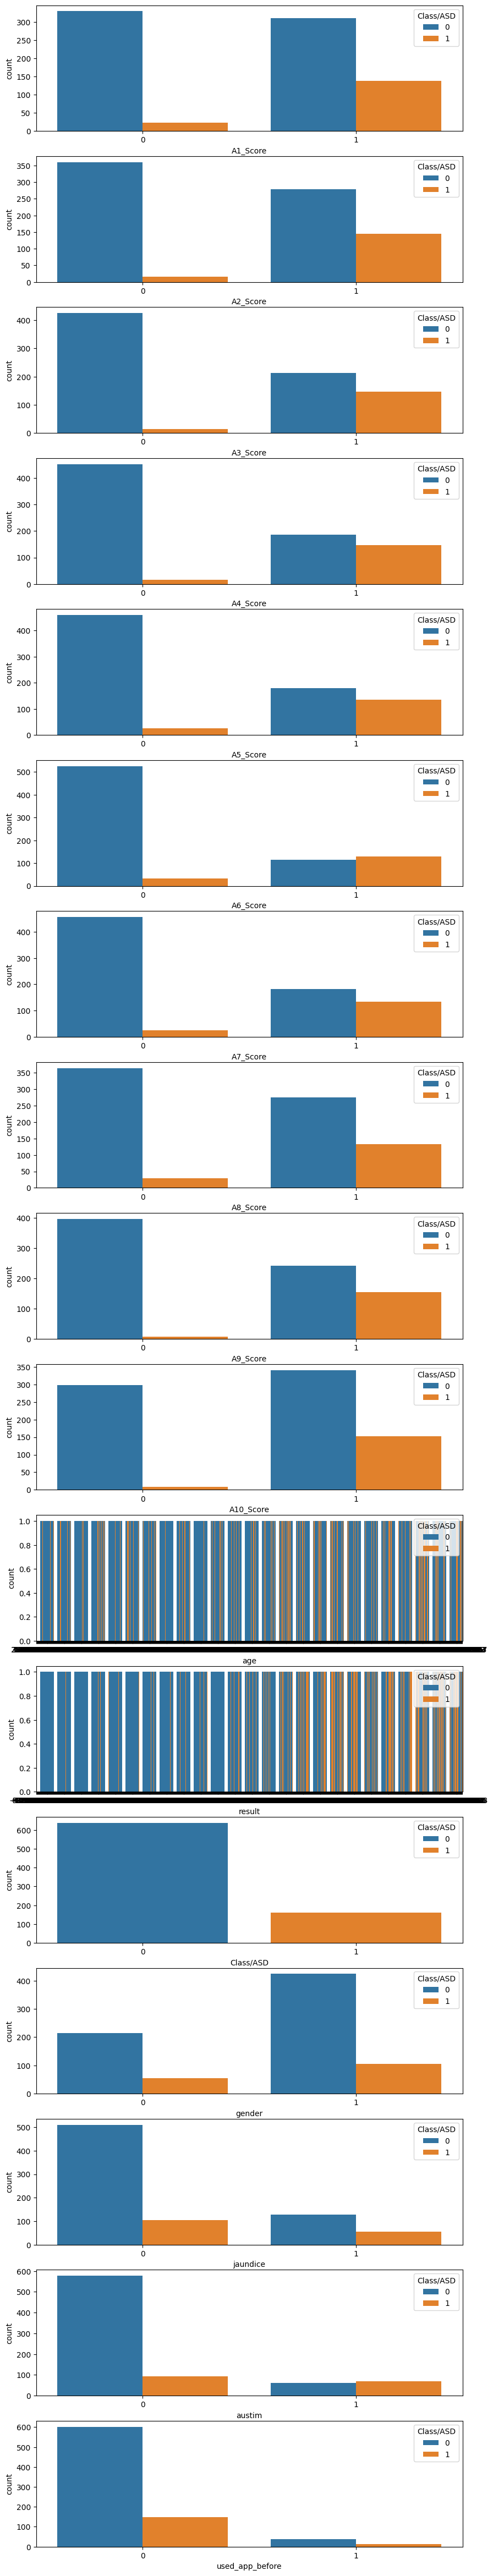

In [ ]:
fig,ax = plt.subplots(nrows=len(num_df.columns),figsize = (10,60))
for item in range(0,len(num_df.columns)):
        sns.countplot(data =num_df, x=num_df.columns[item],ax=ax[item],hue = 'Class/ASD')

The data points for the tests are mostly distributed as per the dependent variable , so an inference cannot be made.

Males have a lower chance of autism, as well as people with jaundice and it's highly hereditary.

Young people have a higher tendancy towards autism and people with higher test scores have greater tendency towards autism.

Lets combine this inference in a scatter plot and see the results

<Axes: xlabel='age', ylabel='result'>

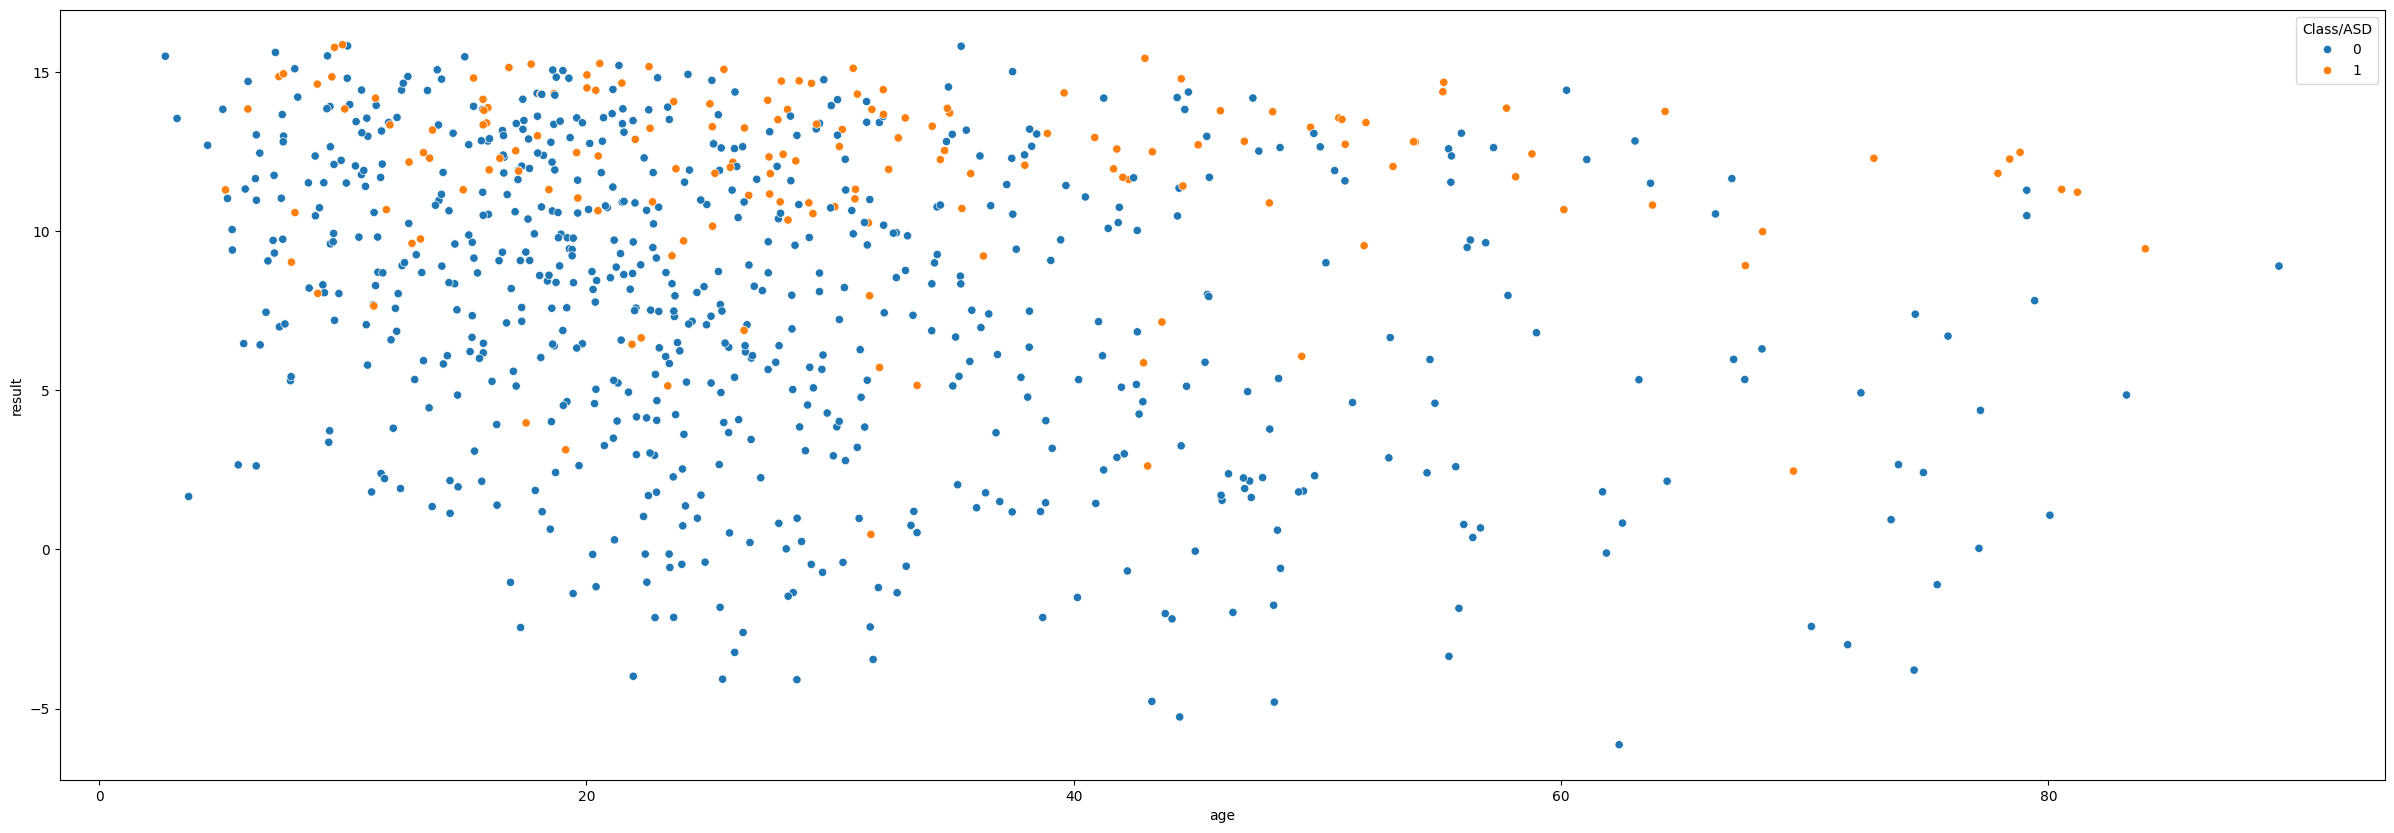

In [ ]:
fig,ax = plt.subplots(figsize = (30,10))
sns.scatterplot(ax =ax ,data = num_df,x = 'age',y='result',hue = 'Class/ASD')

Most points lie in top left indicating higher test score and lower age.

<Axes: >

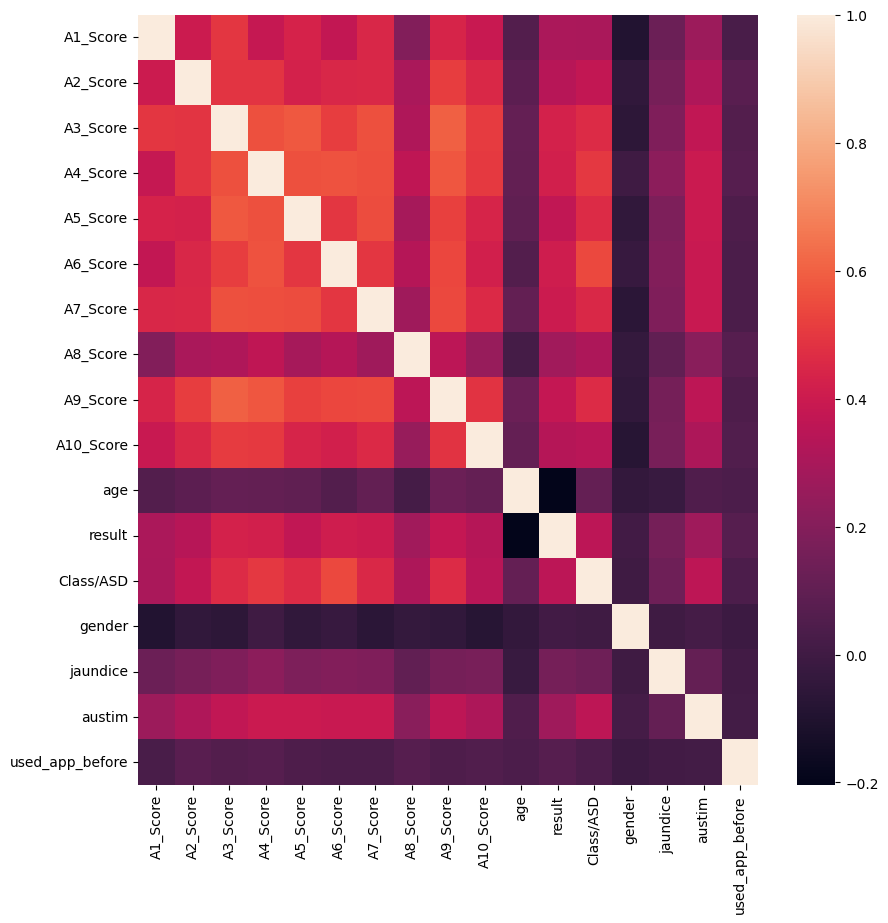

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(num_df.corr(),ax = ax)

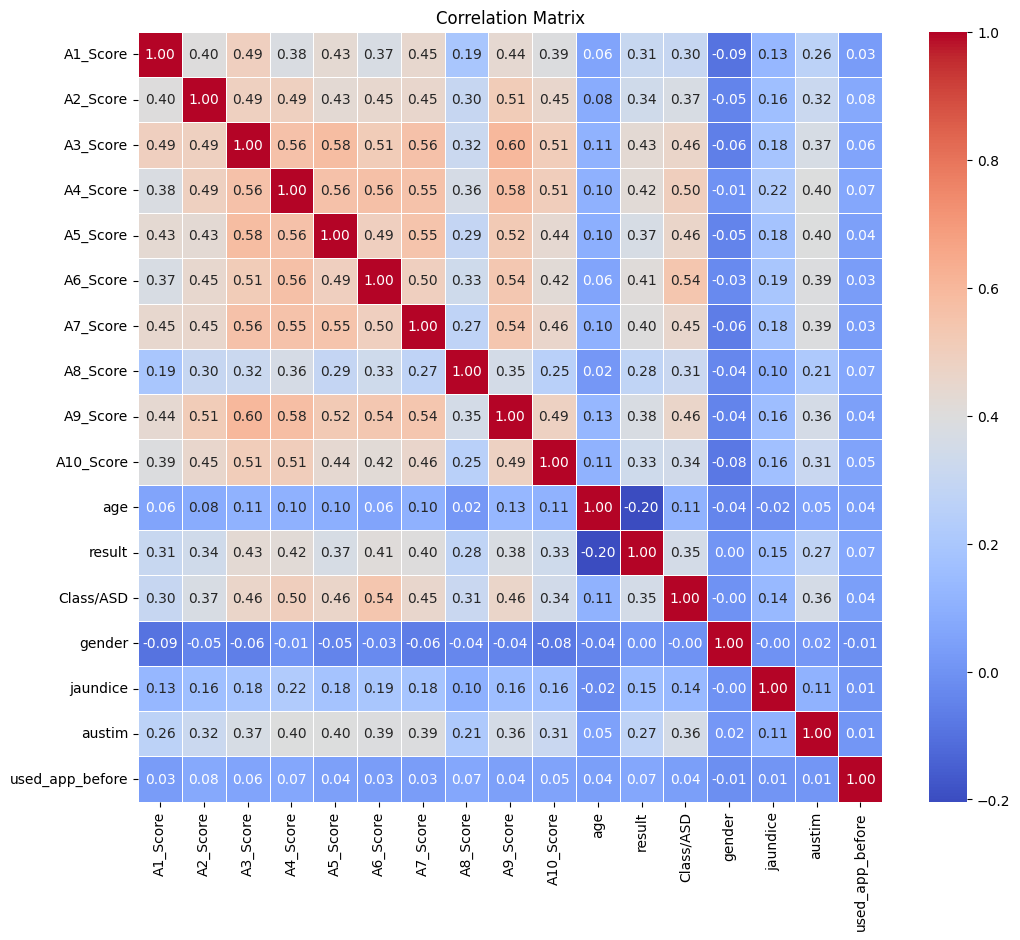

In [ ]:
correlation_matrix = num_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<ipython-input-118-ddf1686d16b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.drop(item,axis=1,inplace=True)
<ipython-input-118-ddf1686d16b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.drop(item,axis=1,inplace=True)
<ipython-input-118-ddf1686d16b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.drop(item,axis=1,inplace=True)
<ipython-input-118-ddf1686d16b6>:3: SettingWithCopyWarning: 
A value is trying 

<Axes: xlabel='Count', ylabel='contry_of_res'>

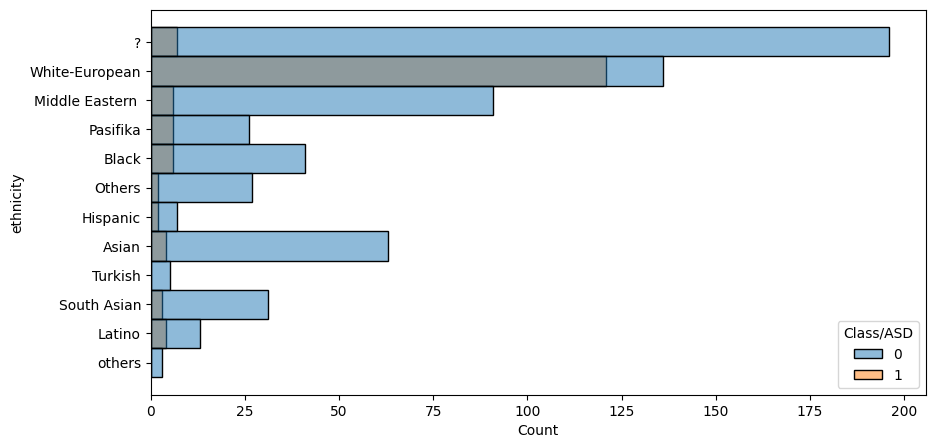

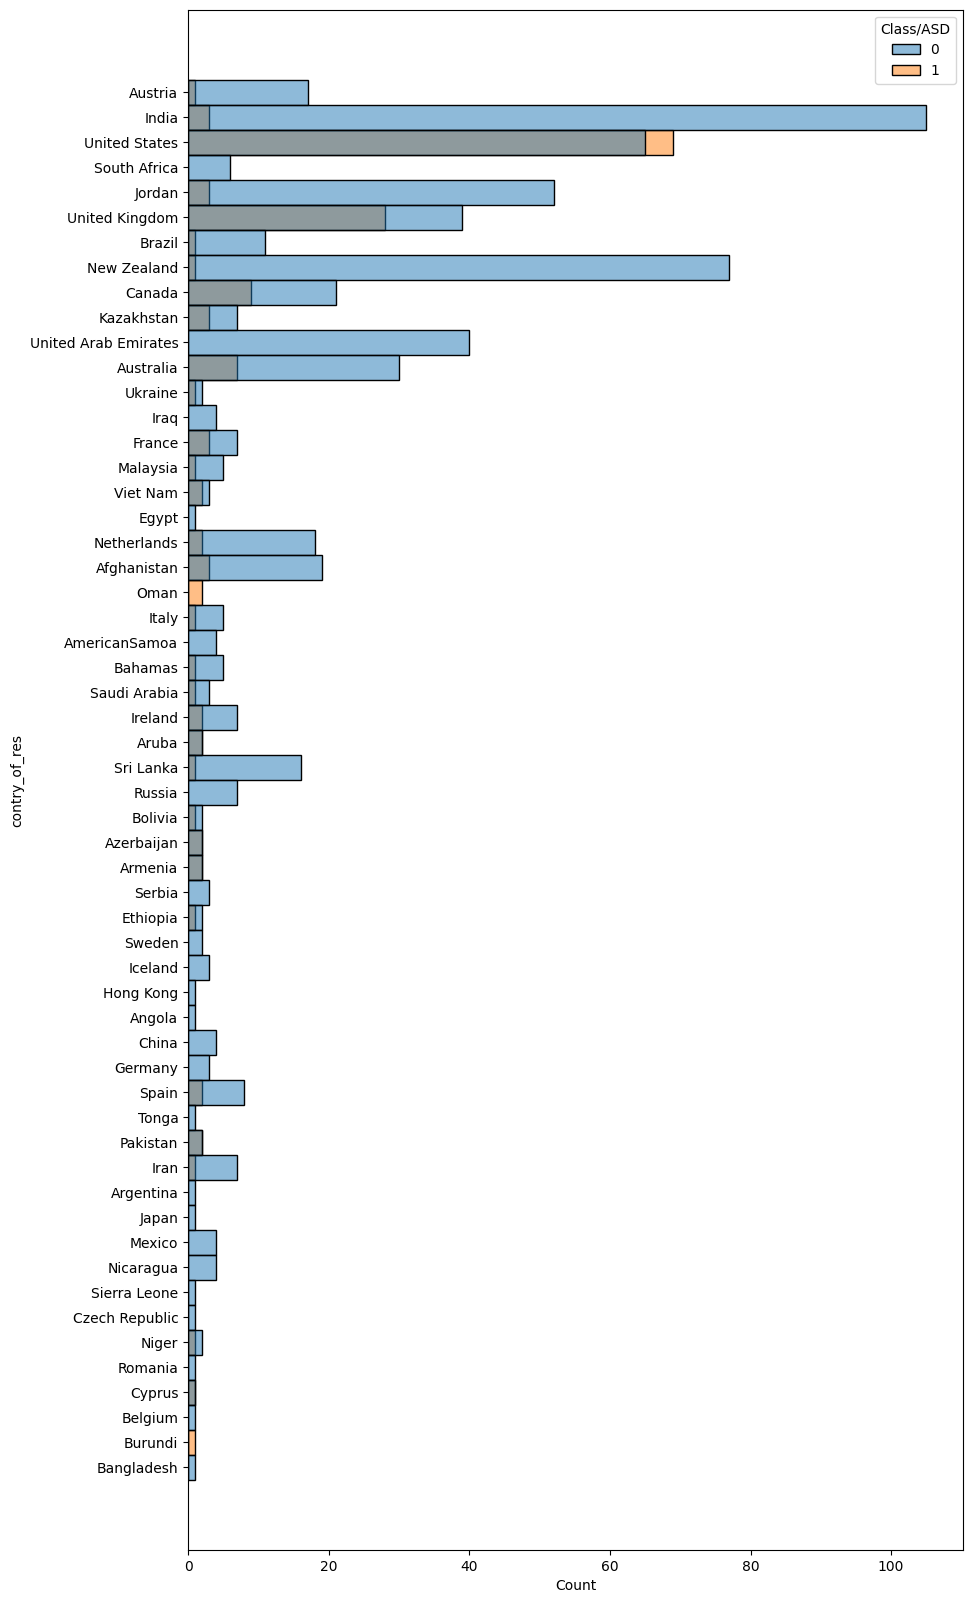

In [ ]:
for item in cat_df:
    if(cat_df[item].dtype != 'object'):
        cat_df.drop(item,axis=1,inplace=True)

cat_df['Class/ASD'] = num_df['Class/ASD']

fig,ax = plt.subplots(figsize = (10,5))

sns.histplot(data =cat_df, y='ethnicity',ax=ax,hue = 'Class/ASD')

fig,ax = plt.subplots(figsize = (10,20))

sns.histplot(data =cat_df, y='contry_of_res',ax=ax,hue = 'Class/ASD')

From the 2 graphs above, The people from American and European nations are more likely to have autism

#Data Preprocessing

In [ ]:
country_ratio = (train[train['Class/ASD'] == 1]['contry_of_res'].value_counts() /
                 train[train['Class/ASD'] == 0]['contry_of_res'].value_counts() *
                 train['contry_of_res'].value_counts()).sort_values(ascending=False)

country_ratio.fillna(0, inplace=True)

country_label = (country_ratio - country_ratio.min()) / (country_ratio.max() - country_ratio.min())

countries_to_exclude = ['Uruguay', 'Lebanon', 'Philippines']
for country in countries_to_exclude:
    country_label[country] = 0

country_label = country_label.to_dict()

In [ ]:
country_label

{'United States': 1.0,
 'United Kingdom': 0.33816425120772947,
 'Canada': 0.09038657643459719,
 'Australia': 0.060692912250342484,
 'France': 0.030128858811532398,
 'Kazakhstan': 0.030128858811532398,
 'Aruba': 0.028120268224096908,
 'Azerbaijan': 0.028120268224096908,
 'Pakistan': 0.028120268224096908,
 'Armenia': 0.028120268224096908,
 'Afghanistan': 0.024420232931452575,
 'Viet Nam': 0.023433556853414087,
 'Jordan': 0.0223069435431538,
 'India': 0.021692778344303325,
 'Ireland': 0.01807731528691944,
 'Spain': 0.017575167640060566,
 'Netherlands': 0.015622371235609393,
 'Cyprus': 0.014060134112048454,
 'Ukraine': 0.01054510058403634,
 'Bolivia': 0.01054510058403634,
 'Niger': 0.01054510058403634,
 'Ethiopia': 0.01054510058403634,
 'Saudi Arabia': 0.009373422741365635,
 'Malaysia': 0.008436080467229073,
 'Italy': 0.008436080467229073,
 'Bahamas': 0.008436080467229073,
 'Iran': 0.008034362349741973,
 'Brazil': 0.007669164061117338,
 'Sri Lanka': 0.007469446247025741,
 'Austria': 0.0074

In [ ]:
eth_label = train.loc[:, ['ethnicity', 'Class/ASD']]

mapper = {'?': 'others', 'Others': 'others'}
eth_label['ethnicity'] = eth_label['ethnicity'].map(lambda x: mapper.get(x, x))

ethnicity_ratio = (eth_label[eth_label['Class/ASD'] == 1]['ethnicity'].value_counts() /
                   eth_label[eth_label['Class/ASD'] == 0]['ethnicity'].value_counts() *
                   eth_label['ethnicity'].value_counts()).sort_values(ascending=False)

ethnicity_ratio.fillna(0, inplace=True)

ethnicity_label = (ethnicity_ratio - ethnicity_ratio.min()) / (ethnicity_ratio.max() - ethnicity_ratio.min())

ethnicity_label = ethnicity_label.to_dict()

ethnicity_label

{'White-European': 1.0,
 'others': 0.040928171940439864,
 'Pasifika': 0.0322959672093029,
 'Black': 0.030080542629396453,
 'Middle Eastern ': 0.027970614458056983,
 'Latino': 0.022876310106589557,
 'Asian': 0.018604356772025682,
 'South Asian': 0.01438993700253214,
 'Hispanic': 0.011245917153239403,
 'Turkish': 0.0}

We have used Min-Max scaling on our categorical variables and have scaled them into numerical values.

Min-Max scaling, also known as normalization, is a technique used to scale numerical features to a fixed range, usually between 0 and 1. This scaling method preserves the shape of the original distribution while ensuring that all features have the same scale.


In [ ]:
def preprocess(data : pd.DataFrame):
    data_temp = data.copy()
    data_temp.drop(['age_desc', 'relation', 'ID'], axis=1, inplace=True)
    data_temp['gender'] = data_temp['gender'].map(lambda x: 1 if x == 'm' else 0)
    data_temp['used_app_before'] = data_temp['used_app_before'].map(lambda x: 1 if x == 'yes' else 0)
    data_temp['jaundice'] = data_temp['jaundice'].map(lambda x: 1 if x == 'yes' else 0)
    data_temp['austim'] = data_temp['austim'].map(lambda x: 1 if x == 'yes' else 0)
    data_temp['ethnicity'] = data_temp['ethnicity'].map(lambda x: 'others' if (x == 'Others' or x == '?') else x)
    data_temp['ethnicity'] = data_temp['ethnicity'].map(ethnicity_label)
    data_temp['age'] = (data_temp['age'] - data_temp['age'].min()) / (data_temp['age'].max() - data_temp['age'].min())
    data_temp['result'] = (data_temp['result'] - data_temp['result'].min()) / (data_temp['result'].max() - data_temp['result'].min())
    data_temp['contry_of_res'] = data_temp['contry_of_res'].map(country_label)
    return data_temp

The above function performs various data preprocessing steps such as dropping columns, mapping categorical variables to numerical values, normalizing numerical columns, and dropping unnecessary columns.

In [ ]:
train_preprocess = preprocess(train)

In [ ]:
train_preprocess

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,0.408726,0,0.040928,0,0,0.007444,0,0.567913,0
1,0,0,0,0,0,0,0,0,0,0,0.519141,1,0.040928,0,0,0.021693,0,0.381655,0
2,1,1,1,1,1,1,1,1,1,1,0.053743,1,1.000000,0,1,1.000000,0,0.954452,1
3,0,0,0,0,0,0,0,0,0,0,0.240288,0,0.040928,0,0,1.000000,0,0.382630,0
4,0,0,0,0,0,0,0,0,0,0,0.466748,1,0.040928,0,0,0.000000,0,0.061865,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,0,0,0,0,0,0,1,1,0.159997,1,0.011246,0,0,0.007121,0,0.870236,0
796,0,1,1,0,0,1,0,1,1,1,0.207330,1,1.000000,0,0,0.014060,0,0.895793,0
797,0,0,0,0,0,0,0,0,0,0,0.034503,1,0.014390,1,0,0.007121,0,0.399753,0
798,0,0,0,0,0,0,0,0,0,0,0.157889,0,0.040928,0,0,0.090387,0,0.691518,0


We have preprocessed our data and now can begin with the model training and evaluating which model works best for this data.

#Model Selection

In [ ]:
from sklearn.model_selection import train_test_split
columns_to_drop = ['Class/ASD', 'austim']

x_train, x_test, y_train, y_test = train_test_split(train_preprocess.drop(columns=columns_to_drop, axis=1),
                                                    train_preprocess['Class/ASD'],
                                                    test_size=0.2,
                                                    random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy = model.score(x_test, y_test)
acc=[]
acc.append(accuracy)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8625
Confusion Matrix:
 [[115   9]
 [ 13  23]]


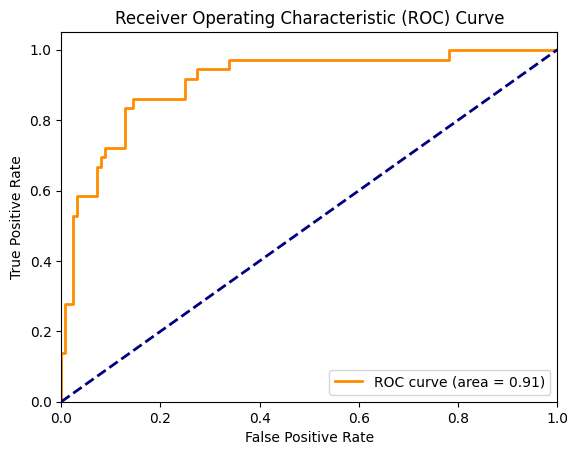

In [ ]:
y_prob = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score

model = SVC()
model.fit(x_train, y_train)
pred = model.predict(x_test)

accuracy = accuracy_score(y_test, pred)
acc.append(accuracy)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.85625
Confusion Matrix:
 [[114  10]
 [ 13  23]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
model = DecisionTreeClassifier(criterion='gini',
                               max_depth=10,
                               min_samples_split=100,
                               min_samples_leaf=1,
                               random_state=42)
model.fit(x_train, y_train)
pred = model.predict(x_test)

accuracy = accuracy_score(y_test, pred)
acc.append(accuracy)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.86875
Confusion Matrix:
 [[119   5]
 [ 16  20]]


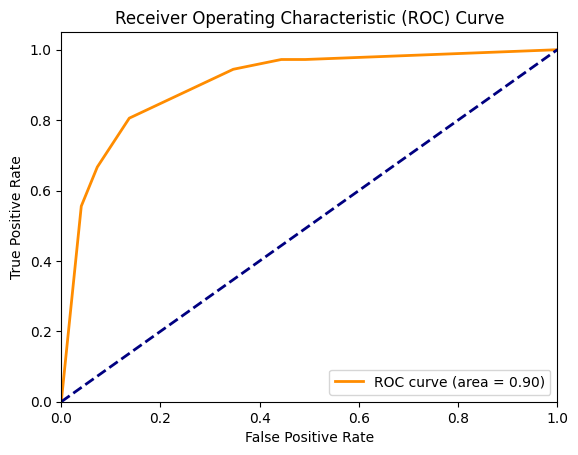

In [ ]:
y_prob = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

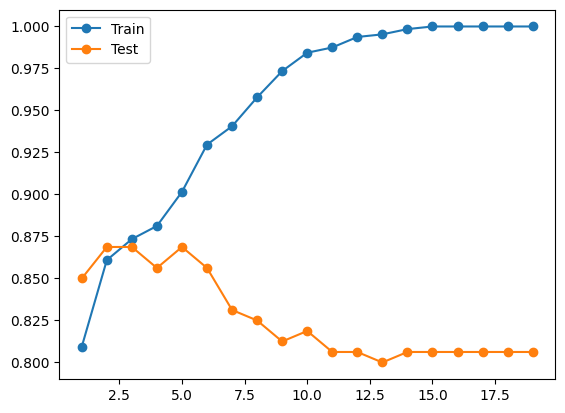

In [ ]:
test_acc = []
train_acc=[]
ran = [i for i in range(1,20)]
for i in ran:
  model = DecisionTreeClassifier(max_depth=i,random_state=42)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_train)
  train_acc.append(accuracy_score(y_train,y_pred))
  y_pred = model.predict(x_test)
  test_acc.append(accuracy_score(y_test,y_pred))

plt.plot(ran,train_acc,'-o',label='Train')
plt.plot(ran,test_acc,'-o',label='Test')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
model = RandomForestClassifier(n_estimators=10,max_depth=15,random_state=42)
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
acc.append(accuracy)

Accuracy: 0.85625


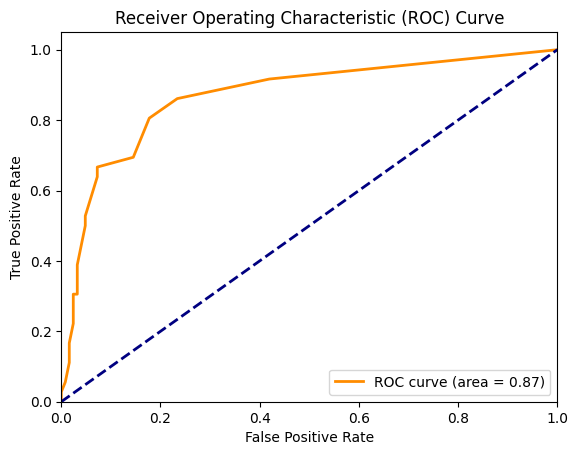

In [ ]:
y_prob = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
model = GaussianNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)

accuracy = accuracy_score(y_test, pred)

conf_matrix = confusion_matrix(y_test, pred)

print("Accuracy:", accuracy)
acc.append(accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8375
Confusion Matrix:
 [[104  20]
 [  6  30]]


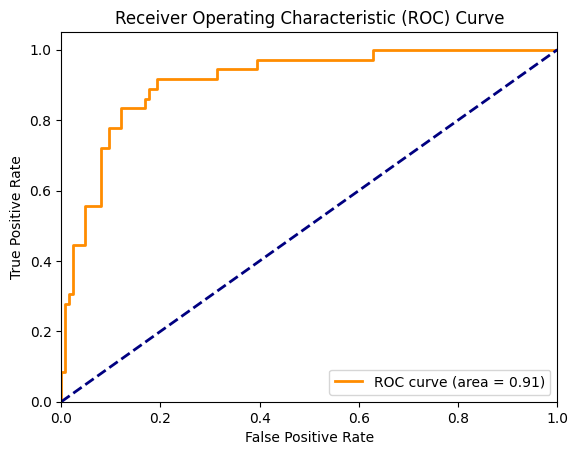

In [ ]:
y_prob = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

ada_model = AdaBoostClassifier()

grid_search = GridSearchCV(ada_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_ada_model = grid_search.best_estimator_
ada_pred = best_ada_model.predict(x_test)

ada_accuracy = accuracy_score(y_test, ada_pred)
print("Accuracy:", ada_accuracy)
acc.append(accuracy)
conf_matrix_ada = confusion_matrix(y_test, ada_pred)
print("Confusion Matrix:\n", conf_matrix_ada)


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Accuracy: 0.875
Confusion Matrix:
 [[118   6]
 [ 14  22]]


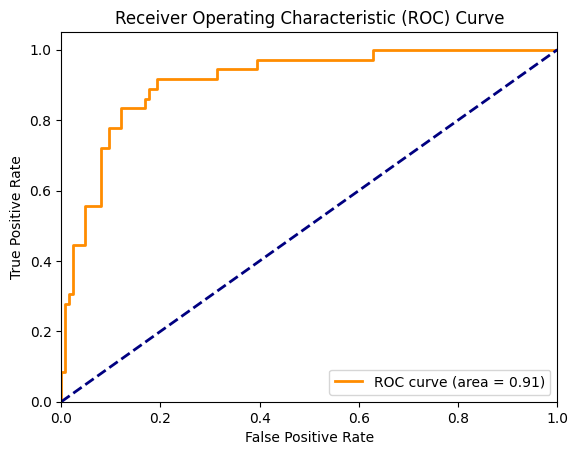

In [ ]:
y_prob = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'Accuracy')

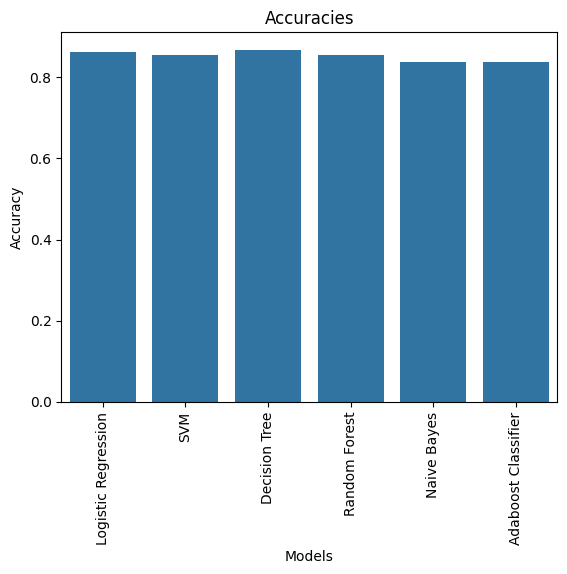

In [ ]:
models = ['Logistic Regression','SVM','Decision Tree','Random Forest','Naive Bayes','Adaboost Classifier']
sns.barplot(x=models,y=acc)
plt.xticks(rotation=90)
plt.title('Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

Conclusion:

Various machine learning models were applied on the dataset. Following are the accuracies obtained:


*   Logistic Regression: 86.25%
*   SVC: 85.625%
*   Decision Tree Classifier: 86.875%
*   Random Forest: 86.25%
*   Gaussian Naive Bayes: 83.75%
*   Adaboost Classifier: 87.5%



Hence, we get the best accuracy for the prediction of a person having ASD using Decision Tree or Adaboost Classifier

We use Decision Tree Classifier on analysizing the ROC AUC curve and accuracy.